# Udacity ML Azure Pipeline Optimization
## A closer look at the CLEANED dataset

## Clean the data

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

raw_data_url = "https://automlsamplenotebookdata.blob.core.windows.net/automl-sample-notebook-data/bankmarketing_train.csv"

df = pd.read_csv(raw_data_url)

def clean_data(data):
    # Dict for cleaning data
    months = {"jan":1, "feb":2, "mar":3, "apr":4, "may":5, "jun":6, "jul":7, "aug":8, "sep":9, "oct":10, "nov":11, "dec":12}
    weekdays = {"mon":1, "tue":2, "wed":3, "thu":4, "fri":5, "sat":6, "sun":7}

    # Clean and one hot encode data
    x_df = data.dropna()  # Remove rows with missing values
    # Useful reference:
    # https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html
    # Convert categorical variable into dummy/indicator variables (OHE).
    jobs = pd.get_dummies(x_df.job, prefix="job")
    x_df.drop("job", inplace=True, axis=1)
    x_df = x_df.join(jobs)
    # Binary features:
    x_df["marital"] = x_df.marital.apply(lambda s: 1 if s == "married" else 0)
    x_df["default"] = x_df.default.apply(lambda s: 1 if s == "yes" else 0)
    x_df["housing"] = x_df.housing.apply(lambda s: 1 if s == "yes" else 0)
    x_df["loan"] = x_df.loan.apply(lambda s: 1 if s == "yes" else 0)
    # Convert categorical variable into dummy/indicator variables (OHE).
    contact = pd.get_dummies(x_df.contact, prefix="contact")
    x_df.drop("contact", inplace=True, axis=1)
    x_df = x_df.join(contact)
    # Convert categorical variable into dummy/indicator variables (OHE).
    education = pd.get_dummies(x_df.education, prefix="education")
    x_df.drop("education", inplace=True, axis=1)
    x_df = x_df.join(education)
    # Map raw feature values for month and day to integers specified in dictionaries (this method ensures that relative
    # temporal position information is preserved).
    x_df["month"] = x_df.month.map(months)
    x_df["day_of_week"] = x_df.day_of_week.map(weekdays)
    # Binary feature:
    x_df["poutcome"] = x_df.poutcome.apply(lambda s: 1 if s == "success" else 0)

    # Extract the binary target column and convert to integer representation
    y_df = x_df.pop("y").apply(lambda s: 1 if s == "yes" else 0)

    # Note: added missing return statement(!)
    # Return the input and target features
    return x_df, y_df

In [2]:
# Use the clean_data function to clean the data.
x, y = clean_data(df)

# Joining input and target feature again into one DataFrame
df_clean = pd.concat([x,y], axis=1)
df_clean

,age,marital,default,housing,loan,month,day_of_week,duration,campaign,pdays,...,contact_telephone,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,y
0,57,1,0,0,1,5,1,371,1,999,...,0,0,0,0,1,0,0,0,0,0
1,55,1,0,1,0,5,4,285,2,999,...,1,0,0,0,0,0,0,0,1,0
2,33,1,0,0,0,5,5,52,1,999,...,0,0,0,1,0,0,0,0,0,0
3,36,1,0,0,0,6,5,355,4,999,...,1,0,0,0,1,0,0,0,0,0
4,27,1,0,1,0,7,5,189,2,999,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945,56,1,0,0,1,7,1,116,1,999,...,0,1,0,0,0,0,0,0,0,0
32946,37,1,0,0,1,7,5,69,7,999,...,0,0,0,0,0,0,0,1,0,0
32947,26,0,0,0,0,5,2,135,4,999,...,0,0,0,0,0,0,0,1,0,0
32948,31,0,0,0,0,4,1,386,1,999,...,0,0,0,1,0,0,0,0,0,0


In [3]:
df_clean.columns

Index(['age', 'marital', 'default', 'housing', 'loan', 'month', 'day_of_week',
       'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'contact_cellular', 'contact_telephone', 'education_basic.4y',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'y'],
      dtype='object')

marital,1,0
y,,
0,17939,11319
1,2027,1665


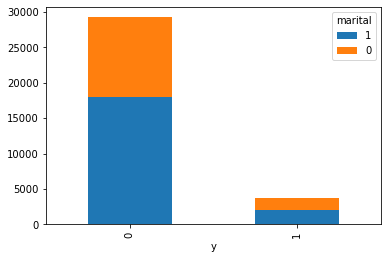

In [5]:
df_sorted = df_clean.copy()
df_sorted = df_sorted.groupby('y').apply(lambda x: x['marital'].value_counts())
#df_sorted = df_sorted.unstack().fillna(0)
df_sorted.plot.bar(stacked=True)
df_sorted

education_university.degree,0,1
y,,
0,20870,8388
1,2363,1329


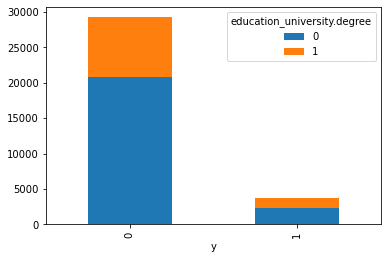

In [9]:
df_sorted = df_clean.copy()
df_sorted = df_sorted.groupby('y').apply(lambda x: x['education_university.degree'].value_counts())
#df_sorted = df_sorted.unstack().fillna(0)
df_sorted.plot.bar(stacked=True)
df_sorted

education_illiterate,0,1
y,,
0,29247,11
1,3688,4


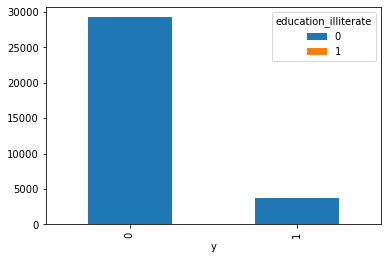

In [10]:
df_sorted = df_clean.copy()
df_sorted = df_sorted.groupby('y').apply(lambda x: x['education_illiterate'].value_counts())
#df_sorted = df_sorted.unstack().fillna(0)
df_sorted.plot.bar(stacked=True)
df_sorted

job_management,0,1
y,,
0,27181,2077
1,3426,266


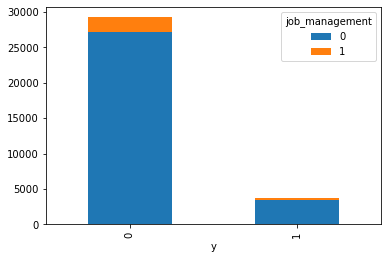

In [11]:
df_sorted = df_clean.copy()
df_sorted = df_sorted.groupby('y').apply(lambda x: x['job_management'].value_counts())
#df_sorted = df_sorted.unstack().fillna(0)
df_sorted.plot.bar(stacked=True)
df_sorted